In [83]:
# Input and output vectors are given. 
inp = [ 0.7300, -1.0400, -1.2300,  1.6700, -0.6300,  1.4300, -0.8400,  0.1500,
         -2.3000,  3.1000, -1.4500, -1.8100,  1.8700, -0.1100, -0.2800,  1.1200,
         -0.4200,  2.8900]
out = [ 1.43,  10.1,  8.3,  1.03,  10.21, -0.1,  8.92,  5.1,
         -7.53, 34.72,  7.61,  3.2,  2.19,  7.15,  7.69, -0.18,
          8.81, 23.1]

In [84]:
# Prepare the training and validation datasets: 80% training, 20% validation

import torch

inp = torch.tensor(inp).unsqueeze(1) #input
out = torch.tensor(out).unsqueeze(1) #ground truth

n_samples = inp.shape[0]
n_val = int (0.2 * n_samples)

random_indexes = torch.randperm(n_samples)
train_indexes = random_indexes[:-n_val]
val_indexes = random_indexes[-n_val:]

inp_train = inp[train_indexes]
out_train = out[train_indexes]
inp_val = inp[val_indexes]
out_val = out[val_indexes]

In [85]:
# Create a NN that consists of:
# a linear layer of input size 1 and output size 15, followed by hyperbolic tangent as its activation function
# a linear layer of input size 15 and output size 23, followed by hyperbolic tangent as its activation function
# a linear layer of input size 23 and output size 1

import torch.nn as nn
from collections import OrderedDict

model = nn.Sequential(OrderedDict([
    ('hidden_linear_1',     nn.Linear(1,15)),
    ('hidden_activation_1', nn.Tanh()),
    ('hidden_linear_2',     nn.Linear(15,23)),
    ('hidden_activation_2', nn.Tanh()),
    ('output_linear',       nn.Linear(23,1)),
]))

# Write a little script that shows the number of parameters in each layer.
# Based on the output of this script, report as a comment in your code how many weights and biases exist in each layer.

print("model params:\n")
print(model.parameters, "\n")
print("hidden_linear_1 weight =",   model.hidden_linear_1.weight.shape) # Layer 1: 15 weights   (1 weight per neuron)
print("hidden_linear_1 bias   =",   model.hidden_linear_1.bias.shape)   # Layer 1: 15 biases    (1 bias per neuron)
print("\n")
print("hidden_linear_2 weight =",   model.hidden_linear_2.weight.shape) # Layer 2: 345 weights  (15 weights per neuron)
print("hidden_linear_2 bias   =",   model.hidden_linear_2.bias.shape)   # Layer 2: 23 biases    (1 bias per neuron)
print("\n")
print("output_linear weight   =",   model.output_linear.weight.shape)   # Layer 3: 23 weights   (23 weights per neuron)
print("output_linear bias     =",   model.output_linear.bias.shape)     # Layer 3: 1 biases     (1 bias per neuron)

# Next, define the training function that receives training and validation datasets, along with a model, loss function, 
# optimizer, and number of epochs. The function must use the model's own parameter handling and the the input loss function
# to automatically calculate the gradient of the loss wrt parameters (autograd), and use optimizer to update the parameters 
# and zero the gradients. 

def training_loop(n_epochs, optimizer, model, loss_fn, inp_train, inp_val, out_train, out_val):
    for epoch in range(1, n_epochs+1):
        prediction_train = model(inp_train)
        prediction_val = model(inp_val)

        los_train = loss_fn(prediction_train, out_train)
        los_val = loss_fn(prediction_val, out_val)

        optimizer.zero_grad()
        los_train.backward()
        optimizer.step()

        if epoch <=5 or epoch % 1000 == 0:
            print("epoch=%d train_loss=%f, val_loss=%f" %(epoch, los_train, los_val))

model params:

<bound method Module.parameters of Sequential(
  (hidden_linear_1): Linear(in_features=1, out_features=15, bias=True)
  (hidden_activation_1): Tanh()
  (hidden_linear_2): Linear(in_features=15, out_features=23, bias=True)
  (hidden_activation_2): Tanh()
  (output_linear): Linear(in_features=23, out_features=1, bias=True)
)> 

hidden_linear_1 weight = torch.Size([15, 1])
hidden_linear_1 bias   = torch.Size([15])


hidden_linear_2 weight = torch.Size([23, 15])
hidden_linear_2 bias   = torch.Size([23])


output_linear weight   = torch.Size([1, 23])
output_linear bias     = torch.Size([1])


In [86]:
# Train your NN with built-in mean square error loss function and SGD optimizer. 
# Try different learning rates and number of epochs improve the results.

import torch.optim as optim

training_loop(
    n_epochs=10000,
    optimizer=optim.SGD(model.parameters(), lr=0.001),
    model=model,
    loss_fn=nn.MSELoss(),
    inp_train=inp_train,
    inp_val=inp_val,
    out_train=out_train,
    out_val=out_val
)

# Results with learning rates and number of epochs:  
# train_loss=3.177183, val_loss=0.706517     n_epochs=1000  lr=0.01
# train_loss=0.012412, val_loss=0.945085     n_epochs=10000 lr=0.01
# train_loss=0.173525, val_loss=0.176220     n_epochs=10000 lr=0.001
# train_loss=3.764897, val_loss=0.803051     n_epochs=1000  lr=0.001

epoch=1 train_loss=154.542892, val_loss=38.982349
epoch=2 train_loss=153.841934, val_loss=38.474941
epoch=3 train_loss=153.145309, val_loss=37.972950
epoch=4 train_loss=152.452179, val_loss=37.475773
epoch=5 train_loss=151.761703, val_loss=36.982841
epoch=1000 train_loss=3.708116, val_loss=1.881486
epoch=2000 train_loss=1.462452, val_loss=0.118284
epoch=3000 train_loss=0.682176, val_loss=0.139671
epoch=4000 train_loss=0.338850, val_loss=0.203636
epoch=5000 train_loss=0.205501, val_loss=0.232423
epoch=6000 train_loss=0.405289, val_loss=0.175160
epoch=7000 train_loss=0.294143, val_loss=0.180480
epoch=8000 train_loss=0.236587, val_loss=0.180571
epoch=9000 train_loss=0.198456, val_loss=0.178988
epoch=10000 train_loss=0.173525, val_loss=0.176220


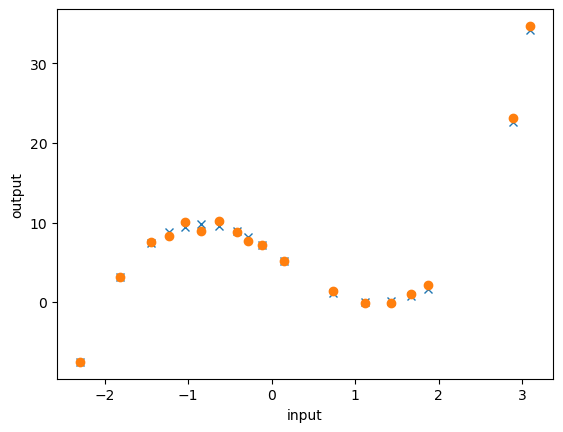

In [87]:
# Plot the trained function.

from matplotlib import pyplot as plt

# full dataset:
preditctions = model(inp)

plt.figure(dpi = 100)
plt.xlabel("input")
plt.ylabel("output")
plt.plot(inp.numpy(), preditctions.detach().numpy(), 'x')
plt.plot(inp.numpy(), out.numpy(), 'o')

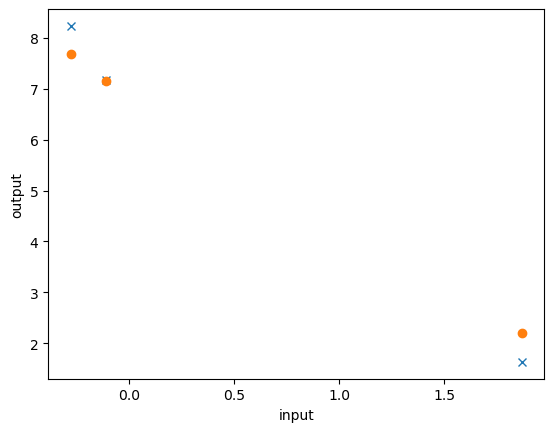

In [88]:
# validation only:
preditctions = model(inp_val)

plt.figure(dpi = 100)
plt.xlabel("input")
plt.ylabel("output")
plt.plot(inp_val.numpy(), preditctions.detach().numpy(), 'x')
plt.plot(inp_val.numpy(), out_val.numpy(), 'o')

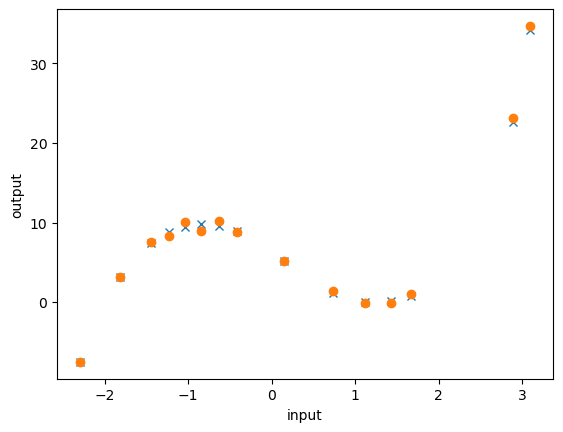

In [89]:
# training only:
preditctions = model(inp_train)

plt.figure(dpi = 100)
plt.xlabel("input")
plt.ylabel("output")
plt.plot(inp_train.numpy(), preditctions.detach().numpy(), 'x')
plt.plot(inp_train.numpy(), out_train.numpy(), 'o')